<a href="https://colab.research.google.com/github/prchlmrie/Colab_Notebooks/blob/main/E_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-banking Usage Level and Influence on Spending Habits Among College of Business and Management Studies

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=25a2b27e56609dcf3dbacd472006e1a3a6a89e6c2c8ba23b77ee6e823d071e1a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import scipy.stats as stats

%matplotlib inline

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab notebooks/E-banking/e-banking.csv',
                 dtype='str', header=0,
                 sep=",", encoding='latin')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sex           288 non-null    object
 1   Year Level    288 non-null    object
 2   Course        288 non-null    object
 3   Income        288 non-null    object
 4   basic         288 non-null    object
 5   daily         288 non-null    object
 6   school_fees   288 non-null    object
 7   leisure       288 non-null    object
 8   online        288 non-null    object
 9   subscription  288 non-null    object
 10  payment       288 non-null    object
 11  phone         288 non-null    object
 12  invest        288 non-null    object
 13  savings       288 non-null    object
 14  wants         288 non-null    object
 15  control       288 non-null    object
 16  lessen        288 non-null    object
 17  track         288 non-null    object
 18  plan          288 non-null    object
 19  analyze 

In [ ]:
df.describe().T

,count,unique,top,freq
Sex,288,2,Female,212
Year Level,288,4,First Year,72
Course,288,4,BSTM,72
Income,288,3,Php 20 000 and Below,156
basic,288,5,3,110
daily,288,5,3,77
school_fees,288,5,3,87
leisure,288,5,4,81
online,288,5,3,75
subscription,288,5,5,79


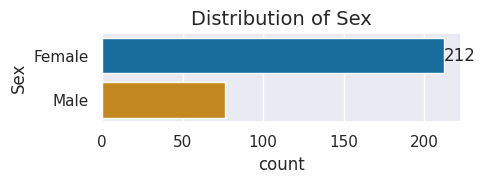

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))
p = sns.barplot(
    y="Sex",  # Specify "Sex" as the y-axis
    x="count",  # Count occurrences for each "Sex" value in df
    order=df["Sex"].value_counts().index,  # Order bars based on counts
    data=df.value_counts("Sex").reset_index(name="count"),  # Reshape data for counting
    hue="Sex",  # Assign "Sex" as the hue variable (deprecated behavior)
    palette="colorblind",  # Set color palette
    legend=False  # Suppress the legend (since there's no hue)
)

ax.set_title("Distribution of Sex", fontsize=14)
ax.bar_label(ax.containers[0])  # Add frequency counts to the bars


# Display the plot
plt.tight_layout()  # Prevent overlapping elements
plt.show()

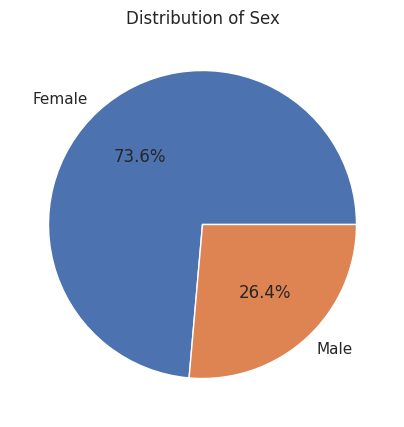

In [ ]:
plt.figure(figsize=(5,5))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

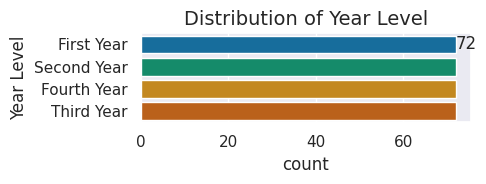

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))

# Create the countplot with clear title and legend
p = sns.barplot(
   y="Year Level",  # Specify "Sex" as the y-axis for horizontal orientation
   x="count",  # Count occurrences for each "Sex" value in df
   order=df["Year Level"].value_counts().index,  # Order bars based on counts
   data=df.value_counts("Year Level").reset_index(name="count"),  # Reshape data for counting
    hue="Year Level",
    palette="colorblind",  # Set color palette
    legend=False  # Suppress the legend (since there's no hue)
)
ax.set_title("Distribution of Year Level", fontsize=14)
ax.bar_label(ax.containers[0])  # Add frequency counts to the bars


# Display the plot
plt.tight_layout()  # Prevent overlapping elements
plt.show()

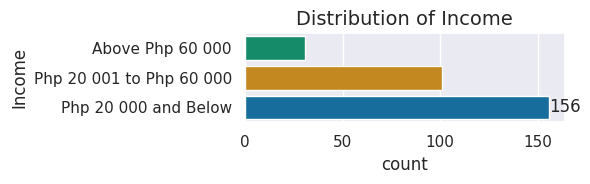

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
order = ["Above Php 60 000", "Php 20 001 to Php 60 000", "Php 20 000 and Below"]

# Create the countplot with clear title and legend
p = sns.barplot(
   y="Income",
   x="count",
   order=order,  # Order bars based on counts
   data=df.value_counts("Income").reset_index(name="count"),  # Reshape data for counting
    hue="Income",
    palette="colorblind",  # Set color palette
    legend=False  # Suppress the legend (since there's no hue)
)
ax.set_title("Distribution of Income", fontsize=14)
ax.bar_label(ax.containers[0])  # Add frequency counts to the bars


# Display the plot
plt.tight_layout()  # Prevent overlapping elements
plt.show()

In [ ]:
df1 = df.loc[:, ['Sex', 'Year Level', 'Course', 'Income']]
df1.head()

,Sex,Year Level,Course,Income
0,Male,First Year,BSTM,Php 20 000 and Below
1,Female,First Year,BSTM,Above Php 60 000
2,Male,Second Year,BSTM,Php 20 001 to Php 60 000
3,Male,Second Year,BSTM,Php 20 001 to Php 60 000
4,Female,Second Year,BSTM,Php 20 001 to Php 60 000


In [ ]:
influence = df.iloc[:,14:23].astype(int).mean(axis=1)
df1['Influence'] = influence
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         288 non-null    object 
 1   Year Level  288 non-null    object 
 2   Course      288 non-null    object 
 3   Income      288 non-null    object 
 4   Influence   288 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.4+ KB


In [ ]:
def labeltonumeric(df, column):
   from sklearn.preprocessing import LabelEncoder
   le = LabelEncoder()
   df[column] = le.fit_transform(df[column])
   return df

encoded = labeltonumeric(df, 'Sex')
encoded = labeltonumeric(df, 'Year Level')
encoded = labeltonumeric(df, 'Income')
encoded = labeltonumeric(df, 'Course')
print(encoded)

     Sex  Year Level  Course  Income basic daily school_fees leisure online  \
0      1           0       3       1     5     5           4       5      5   
1      0           0       3       0     3     2           3       4      3   
2      1           2       3       2     3     3           4       3      4   
3      1           2       3       2     2     3           4       4      1   
4      0           2       3       2     3     3           4       3      1   
..   ...         ...     ...     ...   ...   ...         ...     ...    ...   
283    0           2       0       1     3     1           1       4      1   
284    1           0       0       2     4     2           3       4      4   
285    0           0       0       1     3     3           2       2      3   
286    0           2       0       2     1     1           1       2      2   
287    0           2       0       1     3     2           2       2      1   

    subscription  ... wants control lessen track pl

In [ ]:
encoded.to_csv('e-banking-regression.csv', index=False)  # Optional: exclude the index column

In [ ]:
usage = df.iloc[:,4:13].astype(int).mean(axis=1)
df1['Usage'] = usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         288 non-null    object 
 1   Year Level  288 non-null    object 
 2   Course      288 non-null    object 
 3   Income      288 non-null    object 
 4   Influence   288 non-null    float64
 5   Usage       288 non-null    float64
dtypes: float64(2), object(4)
memory usage: 13.6+ KB


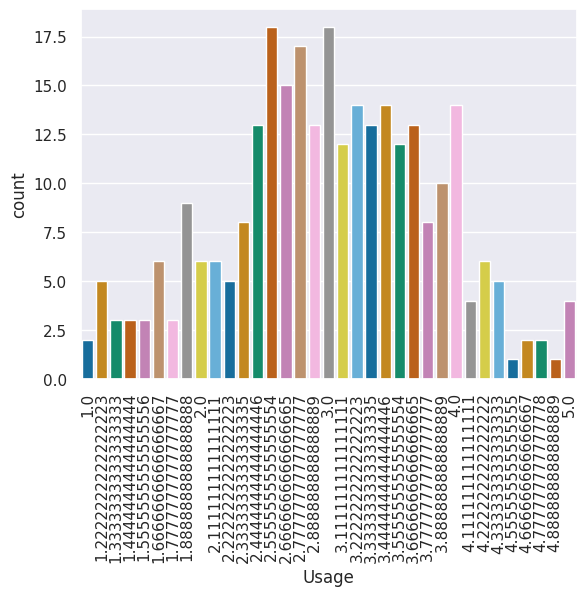

In [ ]:
p = sns.countplot(x="Usage", data = df1,  hue="Usage", palette="colorblind", legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)